# Book Recommendation Engine

You've just finished a book. Well done, you! According to a Gallup poll, Americans read 12.6 books a year. And you know the worst thing when you've just finished a book is not knowing what to read next.

So, that's why I built a book recommendation engine. Using data like genres, reader ratings, and series, I'll give you at least five books to read next for every one you input.

Let's get started.

In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import neighbors

import warnings 
warnings.filterwarnings('ignore')

## EDA

The data comes from a Kaggle dataset full of book information. Included is the book title, author, average rating, language, description, genres, and more. Let's dig into it.

In [2]:
# data upload
df1 = pd.read_csv("data/books_1.csv", error_bad_lines=False)
df1.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


We do have some missing data for langauge, edition, publisher, price, and a few other columns. We're not going to be using most of these, so there isn't a problem yet.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

There are few columns for ratings. There is a strong correlation between "likedPercent" and "rating". The former refers to how many readers added the equivalent of a "thumbs up" or "would recommend" to their review while the latter is the average rating out of 5 readers have given the book. It's uncler what "bbe" refers to in "bbeScore" and "bbeVotes." We don't need these categories anyway since we have "rating." 

In [4]:
df1.corr()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
rating,1.000000,0.014862,0.805538,0.015355,0.015552
numRatings,0.014862,1.000000,0.014014,0.709224,0.719138
likedPercent,0.805538,0.014014,1.000000,0.005688,0.005931
bbeScore,0.015355,0.709224,0.005688,1.000000,0.999303
bbeVotes,0.015552,0.719138,0.005931,0.999303,1.000000


Most of the ratings seem to be around 4 out of 5, with quite a few near but not on 5. Almost nothing seems to rank lower than a 2.

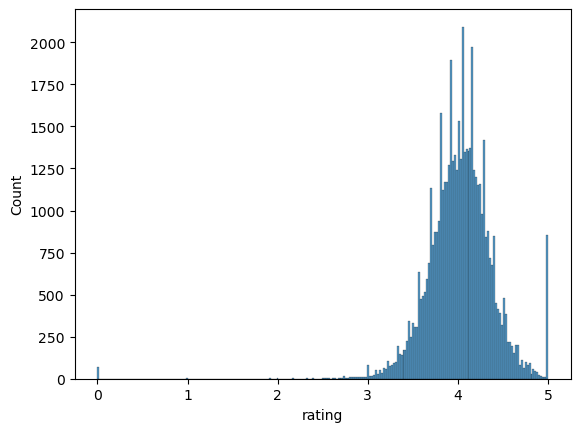

In [5]:
sns.histplot(x = df1["rating"]);

Similarly, most of the "likedPercent" is gathered around the 90% mark. There's a good chance people who didn't like the book or didn't finish it didn't bother to like or not like it, meaning the majority of those voting are those who liked the book.

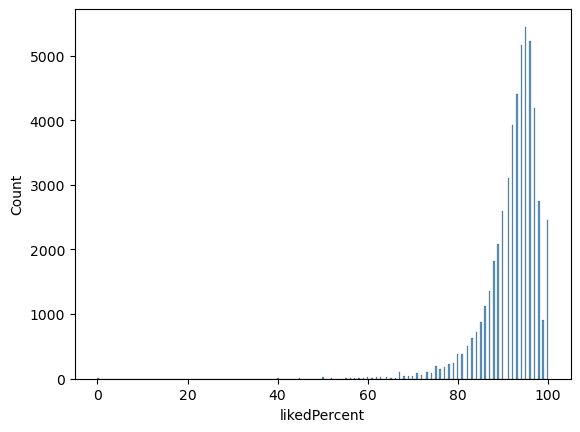

In [6]:
sns.histplot(x = df1["likedPercent"]);

Another key category for us is the genres. Most of the genres in the dataset are in the form of nested lists. We're going to have to one-hot encode these so we know where our books fall in comparison to each other. A lot of the genres listed are also a little odd like "Lds Fiction." We're going to want to limit our dataset to genres that are represented in a good chunk of our books.

In [7]:
df1["genres"]

0        ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...
1        ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...
2        ['Classics', 'Fiction', 'Historical Fiction', ...
3        ['Classics', 'Fiction', 'Romance', 'Historical...
4        ['Young Adult', 'Fantasy', 'Romance', 'Vampire...
                               ...                        
52473    ['Vampires', 'Paranormal', 'Young Adult', 'Rom...
52474                           ['Mystery', 'Young Adult']
52475    ['Fantasy', 'Young Adult', 'Paranormal', 'Ange...
52476    ['Fiction', 'Mystery', 'Historical Fiction', '...
52477    ['Lds Fiction', 'Historical Fiction', 'Young A...
Name: genres, Length: 52478, dtype: object

Similarly, about half of the books in the dataset belong to series. There are nan values in this column, indicating, perhaps that those books don't belong to any series. We also have a lot of books that seem to be the only books in their series (or at least the only ones we have in the dataset). We're going to want to cut out any series that doesn't have at least 2 books in them.

Also, many series titles are accompanied by a number and hashtag. It doesn't help us to know what number in the series a book is but only that it belongs to a series so the recommendation engine can suggest more books in the same series. We'll remove these from the series titles to help with this.

In [8]:
df1["series"].value_counts().tail(10)

Wrong Reasons #1                  1
H.I.V.E. #2                       1
Weddings by Bella #2              1
Mythic #1                         1
Tunnels #3                        1
Cotton Malone #1                  1
Dirk Pitt #19                     1
Incarnations of Immortality #3    1
Bad Kitty #1                      1
Stripling Warrior #1              1
Name: series, dtype: int64

## Data Preparation

There's a lot to clean up in this dataset to get something usable for our recommendation engine. We'll start with removing extra authors from the set (usually translators or illustrators) and the tag "Goodreads Author" wherever it appears. Then we'll get rid of extra information and unusuable rows. We also only want books that have at least 1000 ratings to ensure that the "rating" score is valid with a good amount of input and not unfairly inflated or deflated.

In [9]:
# remove collections, re-issues, and other reptitive data
df1 = df1[df1["title"].str.contains("Collection") == False]
df1 = df1[df1["title"].str.contains("Box Set") == False]
df1 = df1[df1["title"].str.contains("Boxset") == False]
df1 = df1[df1["title"].str.contains("SAMPLER") == False]
df1 = df1[df1["title"].str.contains("Editor") == False]

# change author column to only contain main author
df1["author"] = df1["author"].str.split(",")
df1["author"] = df1["author"].str[0]
df1["author"] = df1["author"].str.replace("\(Goodreads Author\)", "")


# limit dataframe to works in English
df1 = df1.loc[df1["language"] == "English"]

# drop unnecessary columns
df1 = df1.drop(columns=["bookId", "language", "isbn", "characters", "bookFormat", "edition", 
                        "setting", "bbeScore", "bbeVotes", "price", "ratingsByStars", "coverImg",
                       "likedPercent", "publishDate", "firstPublishDate"])

# rename columns
df1.rename(columns = {"pages": "num_pages"}, inplace = True)

# drop duplicate entries
df1 = df1.drop_duplicates(subset = ["title", "author"])

# remove numbers from series column
df1['series'] = df1['series'].str.replace('\d+', '').str.replace("#", "")

# remove rows with less than 1000 ratings
df1 = df1.loc[df1["numRatings"] >= 1000]

We want to create columns for each individual genre ("Young Adult," "Zombies," etc.) that include 1 or 0 if the book falls into that category or not. We also only want genres that show up at least 500 times.

In [10]:
# separate genres in column
df1["genres"] = df1["genres"].str.strip("[]")
df1["genres"] = df1["genres"].str.split(",")

The code to one-hot encode and stack genres comes from joris on stackoverflow.

In [11]:
# one-hot encode genres
df2 = pd.get_dummies(df1["genres"].apply(pd.Series).stack()).sum(level=0)

In [12]:
# concat dataframes
df = df1.merge(df2, left_index=True, right_index=True)

In [13]:
# drop genres that are represented in less than 500 books
genre_cols = df.columns[10:]
df[genre_cols].astype(int)
for col in df[genre_cols]:
    if df[col].sum() < 500:
        df.drop(col, axis=1, inplace=True)

In [14]:
# fix column names
df.columns = df.columns.str.replace("'","")
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

Instead of using the exact percentages for "ratings," we'll use bins that we can one-hot encode. We can see that the vast majority of books are rated between 3.5 and 4.5. 

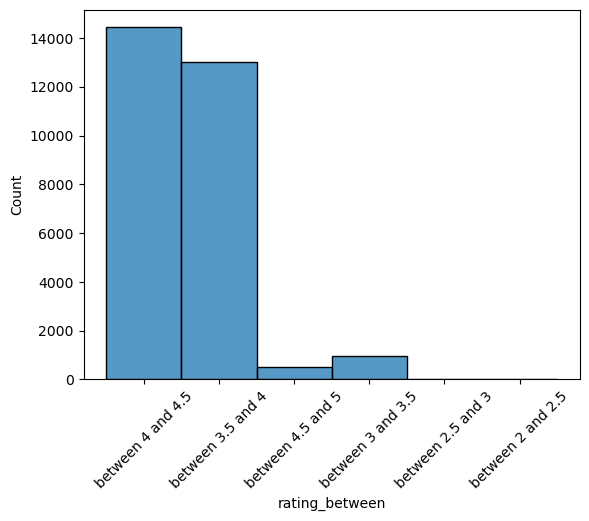

In [15]:
# one-hot encode bins for ratings
df.loc[ (df['rating'] > 2) & (df['rating'] <= 2.5), 'rating_between'] = "between 2 and 2.5"
df.loc[ (df['rating'] > 2.5) & (df['rating'] <= 3), 'rating_between'] = "between 2.5 and 3"

df.loc[ (df['rating'] > 3) & (df['rating'] <= 3.5), 'rating_between'] = "between 3 and 3.5"
df.loc[ (df['rating'] > 3.5) & (df['rating'] <= 4), 'rating_between'] = "between 3.5 and 4"

df.loc[ (df['rating'] > 4) & (df['rating'] <= 4.5), 'rating_between'] = "between 4 and 4.5"
df.loc[ (df['rating'] > 4.5) & (df['rating'] <= 5), 'rating_between'] = "between 4.5 and 5"

# plot count
sns.histplot(data = df, x = "rating_between")
plt.xticks(rotation = 45);

In [16]:
# drop columns
df = pd.get_dummies(df, columns = ["rating_between"], drop_first=True)
df = df.drop(columns=["rating", "genres"])

In [17]:
# reset index
df = df.reset_index().drop(columns = "index")
df

,title,series,author,description,num_pages,publisher,awards,numratings,19th century,20th century,...,nonfiction,paranormal,romance,science fiction,young adult,rating_between_between 2.5 and 3,rating_between_between 3 and 3.5,rating_between_between 3.5 and 4,rating_between_between 4 and 4.5,rating_between_between 4.5 and 5
0,The Hunger Games,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,374,Scholastic Press,['Locus Award Nominee for Best Young Adult Boo...,6376780,0,0,...,0,0,0,0,1,0,0,0,1,0
1,Harry Potter and the Order of the Phoenix,Harry Potter,J.K. Rowling,There is a door at the end of a silent corrido...,870,Scholastic Inc.,['Bram Stoker Award for Works for Young Reader...,2507623,0,0,...,0,0,0,0,0,0,0,0,1,0
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,324,Harper Perennial Modern Classics,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Pride and Prejudice,NaN,Jane Austen,Alternate cover edition of ISBN 9780679783268S...,279,Modern Library,[],2998241,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Twilight,The Twilight Saga,Stephenie Meyer,About three things I was absolutely positive.\...,501,"Little, Brown and Company","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28985,Heal Your Body: The Mental Causes for Physical...,NaN,Louise L. Hay,Heal Your Body is a fresh and easy step-by-ste...,96,Hay House,[],14868,0,0,...,0,0,0,0,0,0,0,0,1,0
28986,Attracted to Fire,NaN,DiAnn Mills,Special Agent Meghan Connors' dream of one day...,416,Tyndale House Publishers,['HOLT Medallion by Virginia Romance Writers N...,2143,0,0,...,0,0,0,0,0,0,0,0,1,0
28987,Elemental,Soul Guardians,Kim Richardson,When seventeen-year-old Kara Nightingale is su...,151,Kim Richardson,[],1947,0,0,...,0,0,0,0,0,0,0,0,1,0
28988,Unbelievable,Port Fare,Sherry Gammon,Lilah Lopez Dreser's in town to take care of u...,360,Wordpaintings Unlimited,[],1028,0,0,...,0,0,1,0,0,0,0,0,1,0


## The Recommendation Engine

Now that our dataset is cleaned up, we're going to make a recommendation engine using the K Nearest Neighbors model. We'll remove all our categorical columns so we match books based on genres, reader ratings, and series.

In [18]:
# drop non-numerical columns for model
features = df.drop(columns = ["title", "author", "description", "num_pages", "publisher", "awards", 
                              "numratings", "series"])

# fit and transform with MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [19]:
# fit KNN model
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

Now that we have the model, we'll define a function that gives us a list of recs for every book we put in.

In [20]:
# define function
def BookRecommender(book_name):
    book_list_name = []
    book_id = df[df['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        title = df.loc[newid].title
        author = df.loc[newid].author
        if title == book_name:
            pass
        else:
            book_list_name.append(f"{title} by {author}")
        
    return book_list_name   

Let's try it!

In [21]:
BookRecommender('Pride and Prejudice')

['Gone with the Wind by Margaret Mitchell',
 'Les Misérables by Victor Hugo',
 'Les Liaisons dangereuses by Pierre Choderlos de Laclos',
 'Doctor Zhivago by Boris Pasternak',
 'The Color Purple by Alice Walker']

In [22]:
BookRecommender('Twilight')

["Jessica's Guide to Dating on the Dark Side by Beth Fantaskey ",
 'Evernight by Claudia Gray ',
 'Marked by P.C. Cast ',
 'The Awakening / The Struggle by L.J. Smith ',
 'The Fury / Dark Reunion by L.J. Smith ']

In [23]:
BookRecommender('The Hunger Games')

['Divergent by Veronica Roth ',
 'Legend by Marie Lu ',
 'Catching Fire by Suzanne Collins',
 'Insurgent by Veronica Roth ',
 'Salt & Stone by Victoria Scott ']

In [24]:
BookRecommender('Les Misérables')

['Consuelo by George Sand',
 'Les Liaisons dangereuses by Pierre Choderlos de Laclos',
 'The Count of Monte Cristo by Alexandre Dumas',
 'The Man Who Laughs by Victor Hugo',
 'The Three Musketeers by Alexandre Dumas']

In [25]:
BookRecommender("Jane Eyre")

['Wives and Daughters by Elizabeth Gaskell',
 'Anna Karenina by Leo Tolstoy',
 'Eugene Onegin by Alexander Pushkin',
 'El Filibusterismo by José Rizal',
 'Emma by Jane Austen']

## Natural Language Processing

Another way we can match books is by their descriptions. They might use similar phrases or tropes that could point readers in the right direction.

Often when I go to a bookstore and ask a bookseller for a suggestion, they take in all the titles I like and might match on genre but more often match on the feeling of reading the books - similar vibes get selected. This approximates that.

First let's go back to our first dataframe and look at the descriptions.

In [26]:
def description(index):
    name = df1["title"][index]
    desc = df1["description"][index]
    print(name)
    print(desc)
    print("Character count:" + " " + str(len(desc)))

In [27]:
description(0)

The Hunger Games
WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.
Character count: 841


In [28]:
description(152)

The Thorn Birds
Alternate Cover Edition ISBN 0380018179 (ISBN13: 9780380018178)The Thorn Birds is a robust, romantic saga of a singular family, the Clearys. It begins in the early part of this century, when Paddy Cleary moves his wife, Fiona, and their seven children to Drogheda, the vast Australian sheep station owned by his autocratic and childless older sister; and it ends more than half a century later, when the only survivor of the third generation, the brilliant actress Justine O'Neill, sets a course of life and love halfway around the world from her roots.The central figures in this enthralling story are the indomitable Meggie, the only Cleary daughter, and the one man she truly loves, the stunningly handsome and ambitious priest Ralph de Bricassart. Ralph's course moves him a long way indeed, from a remote Outback parish to the halls of the Vatican; and Meggie's except for a brief and miserable marriage elsewhere, is fixed to the Drogheda that is part of her bones - but distanc

There seems to be a range of description lengths for our dataframe, which is useful to know. 

In [29]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer, sent_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

To begin, we're going to want to grab all the useful information from our first dataframe (df1), including genres, series, title, and description. Then we're going to want to combine everything except title into a bag of words column that we can tokenize and lemmatize.

In [30]:
# create stopwords list
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

In [31]:
# make new dataframe
df_desc = df1[["title", "author", "genres", "series", "description"]]

# turn genres list into string
for index, row in df_desc.iterrows():
    row["genres"] = " ".join(row["genres"])
    row["genres"] = row["genres"].replace("'", "")

# create bagofwords column using genres, series, and description
df_desc["bagofwords"] = ""
columns = df_desc.columns

for index, row in df_desc.iterrows():
    row["bagofwords"] = str(row["genres"]) + str(row["series"]) + str(row["description"]) 
    
# create new dataframe
df_bagofwords = df_desc[["title", "author", "bagofwords"]]
df_bagofwords.head()

,title,author,bagofwords
0,The Hunger Games,Suzanne Collins,Young Adult Fiction Dystopia Fantasy Scien...
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,Fantasy Young Adult Fiction Magic Children...
2,To Kill a Mockingbird,Harper Lee,Classics Fiction Historical Fiction School ...
3,Pride and Prejudice,Jane Austen,Classics Fiction Romance Historical Fiction...
4,Twilight,Stephenie Meyer,Young Adult Fantasy Romance Vampires Ficti...


In [32]:
# lemmatize bagofwords column
lemm = WordNetLemmatizer()

for i, row in df_bagofwords.iterrows():
    tokens = word_tokenize(row["bagofwords"])
    filtered_tokens = [w for w in tokens if w.lower() not in stopwords_list]
    lemmatized_tokens = [lemm.lemmatize(token) for token in filtered_tokens]
    df_bagofwords.at[i, "bagofwords"] = " ".join(lemmatized_tokens)

df_bagofwords

,title,author,bagofwords
0,The Hunger Games,Suzanne Collins,Young Adult Fiction Dystopia Fantasy Science F...
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,Fantasy Young Adult Fiction Magic Childrens Ad...
2,To Kill a Mockingbird,Harper Lee,Classics Fiction Historical Fiction School Lit...
3,Pride and Prejudice,Jane Austen,Classics Fiction Romance Historical Fiction Li...
4,Twilight,Stephenie Meyer,Young Adult Fantasy Romance Vampires Fiction P...
...,...,...,...
52469,Heal Your Body: The Mental Causes for Physical...,Louise L. Hay,Self Help Health Nonfiction Spirituality Psych...
52470,Attracted to Fire,DiAnn Mills,Christian Fiction Christian Suspense Romance M...
52471,Elemental,Kim Richardson,Fantasy Young Adult Angels Romance Paranormal ...
52472,Unbelievable,Sherry Gammon,Romance Young Adult Contemporary Contemporary ...


We'll try Count Vectorizing and TF-IDF Vectorizing to see which one yields the best results for our book recommender.

In [33]:
# vectorize bagofwords column
vec = CountVectorizer(min_df = 0.06, max_df = 0.95)
X_cvec = vec.fit_transform(df_bagofwords["bagofwords"])

countvec_df = pd.DataFrame(X_cvec.toarray(), columns=vec.get_feature_names_out())
countvec_df.head()

,adult,adventure,age,also,always,american,and,another,around,audiobook,...,well,whose,woman,work,world,would,year,yet,york,young
0,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
2,1,0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
# tfidf vectorize bagofwords column
tf_vec = TfidfVectorizer()
X_tfidf = tf_vec.fit_transform(df_bagofwords["bagofwords"])

vec_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tf_vec.get_feature_names_out())
vec_tfidf.head()

,00,000,0001,001,002,007,01,0140422536,0141183225,0141183829,...,𝒇𝒂𝒓,𝒇𝒖𝒄𝒌,𝒈𝒐𝒆𝒔,𝒉𝒂𝒑𝒑𝒆𝒏𝒔,𝒉𝒊𝒎,𝒕𝒐,𝒕𝒐𝒐,𝒘𝒉𝒆𝒏,𝒚𝒐𝒖,𝒚𝒐𝒖except
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's compare some results for the keywords both vectorizers found. First for The Hunger Games and second for Anna Karenina.

In [35]:
vec_tfidf.iloc[0].sort_values(ascending=False)[:20]

games          0.388810
katniss        0.296020
hunger         0.267152
capitol        0.258540
means          0.246728
district       0.212675
twelve         0.156100
outlying       0.155833
panem          0.155833
everdeen       0.151427
death          0.145054
survival       0.140164
contender      0.132243
participate    0.116167
actionthe      0.111571
regard         0.110743
annual         0.106337
place          0.104803
shining        0.102920
forcing        0.100675
Name: 0, dtype: float64

In [36]:
countvec_df.iloc[0].sort_values(ascending=False)[:20]

death        3
fiction      2
place        2
live         1
fantasy      1
girl         1
in           1
keep         1
known        1
life         1
adventure    1
adult        1
dead         1
old          1
one          1
romance      1
science      1
take         1
teen         1
the          1
Name: 0, dtype: int64

In [37]:
vec_tfidf.iloc[73].sort_values(ascending=False)[:20]

tolstoy                   0.397654
anna                      0.203625
russia                    0.182572
literaturenanacclaimed    0.178886
vronsky                   0.178886
karenin                   0.178886
edmonds                   0.163396
convictions               0.157708
levin                     0.153459
karenina                  0.153459
expressing                0.148596
kaleidoscope              0.145990
fulfil                    0.143733
repay                     0.139135
inviting                  0.136188
rosemary                  0.135525
literature                0.134168
panorama                  0.128242
comment                   0.122255
brooding                  0.111767
Name: 73, dtype: float64

In [38]:
countvec_df.iloc[73].sort_values(ascending=False)[:20]

literature      3
fiction         2
life            1
novels          1
novel           1
contemporary    1
classics        1
classic         1
historical      1
home            1
turn            1
century         1
many            1
author          1
world           1
woman           1
romance         1
mother          0
man             0
return          0
Name: 73, dtype: int64

For these two books, the TF-IDF seems works better. For Hunger Games, we want to suggest books that include violence and action ("death", "survival). For Anna Karenina, we'll want more romantic classics possibly ("brooding", "literature").

The count vectorizer doesn't give us much to go off of at all but it does include the genres, which is useful for recommendations on the whole.

Now we want to make a function that actually spits out results. We'll do this using cosine similarity. We can try both the Count and TF-IDF Vectorizers.

In [39]:
indices = pd.Series(df_bagofwords["title"])

In [ ]:
# fit and transform dataframe with count vectorizer
count_matrix = vec.fit_transform(df_bagofwords["bagofwords"])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# count vectorizer-based recommender
def VibesBookRecommender(book_name, cosine_sim = cosine_sim):
    recommended_books = []
    idx = indices[indices == book_name].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_5_indices = list(score_series.iloc[1:6].index)
    
    for i in top_5_indices:
        titles = list(df_bagofwords["title"])[i]
        authors = list(df_bagofwords["author"])[i]
        recommended_books.append(f"{titles} by {authors}")
        
    return recommended_books

In [ ]:
# fit and transform dataframe with tf-idf vectorizer
tfidf_matrix = tf_vec.fit_transform(df_bagofwords["bagofwords"])
cosine_sim_tf_vec = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# tf-idf vectorizer-based recommender
def VibesBookRecommender2(book_name, cosine_sim = cosine_sim_tf_vec):
    recommended_books = []
    idx = indices[indices == book_name].index[0]
    score_series = pd.Series(cosine_sim_tf_vec[idx]).sort_values(ascending = False)
    top_5_indices = list(score_series.iloc[1:6].index)
    
    for i in top_5_indices:
        titles = list(df_bagofwords["title"])[i]
        authors = list(df_bagofwords["author"])[i]
        recommended_books.append(f"{titles} by {authors}")
        
    return recommended_books

In [ ]:
VibesBookRecommender("The Hunger Games")

In [ ]:
VibesBookRecommender2("The Hunger Games")

The Count Vectorizer recommender (VibesBookRecommender) seems to be better than the TF-IDF one (VibesRecommender2) for The Hunger Games. For Anna Karenina, we get a good range of books for the Count Vectorizer but basically only Tolstoy books for the TF-IDF recommender.

In [ ]:
VibesBookRecommender("Anna Karenina")

In [ ]:
VibesBookRecommender2("Anna Karenina")

Let's test one more with Twilight.

In [ ]:
VibesBookRecommender("Twilight")

In [ ]:
VibesBookRecommender2("Twilight")

Many of the books the TF-IDF recommender suggests for Twilight seem to just have "Twilight" in the title. 

In conclusion, the Count Vectorizer recommender (VibesBookRecommender) is our best one!

In [ ]:
df_bagofwords.to_csv(r"data/bagofwords.csv")

## Conclusion & Next Steps

As you can see, the book recommendation engine gives you some pretty good suggestions for the books you put in. But there are still a few kinks to work out:

1. Despite the size of the dataset (29k at the end of cleaning), there are still a lot of books that this system doesn't have. We can update it with more recent book releases, especially modern classics and bestsellers.
2. It'd be nice to know what genres the recommendations are falling into to give the user more to explore. We can add to the for loop to allow for this.